<a href="https://colab.research.google.com/github/have-not/tutorial-ml-exercises/blob/master/1_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 実習1
### 最急降下法

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x = np.linspace(0,99,100)

In [3]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [0]:
f_noisy = np.vectorize(lambda x: x * 10 + np.random.normal(0,100))
# lambda式で式を書く
# np.random.normal(0,100)で平均:0, 分散:100 の正規分布に従う乱数を出力
# np.vectorizeでarrayの各値を引数として計算することができる

In [0]:
# 実データ
d = f_noisy(x)

Text(0.5, 1.0, 'Observed data points')

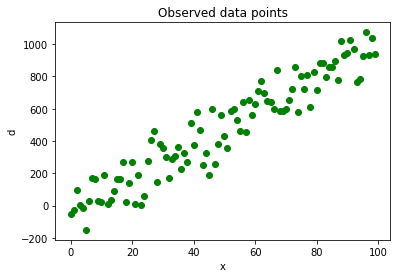

In [6]:
plt.plot(x, d, 'o', color = 'green')
#plt.scatter(x, d,  color = 'red') #xとdの関係をプロット
plt.ylabel('d')
plt.xlabel('x')
plt.title('Observed data points')

In [7]:
#dの中身を表示
d

array([ -53.97124961,  -29.4275192 ,   98.75725001,    2.43906323,
        -16.01659345, -151.02932139,   30.40686417,  172.16975513,
        166.17037791,   25.61600822,   20.53904761,  187.2149542 ,
         12.18589675,   36.62269724,   87.22743201,  165.20626589,
        165.73636088,  268.80623216,   24.69950607,  138.83272348,
        267.12157074,   11.52137351,  191.95251572,    4.80012015,
         59.39179766,  277.74082549,  404.51634998,  461.22469185,
        148.70454541,  382.58230172,  357.01039535,  303.19456755,
        169.84177916,  291.1583507 ,  309.20393649,  362.27190474,
        225.11349046,  324.35115792,  270.02694981,  513.89322906,
        374.17181031,  582.41077331,  466.83951082,  253.00896293,
        324.22389695,  187.20386425,  599.69822306,  256.76854701,
        383.07781176,  563.7921445 ,  430.86434252,  357.08697391,
        586.44970693,  600.49338907,  531.8271388 ,  459.99668113,
        644.04045306,  457.14080479,  651.34697513,  559.63492

$$
\begin{eqnarray}
f(x_n; w) = x_n \times w\\
E(w) = \frac{1}{2} \times \sum_{n=1}^{N} (d_n - f(x_n; w))^2\\
\end{eqnarray}
$$

wの最適解を最急降下法で求める
今回は簡単のためパラメータは一つにする。
wは近似直線の傾きを表す。

In [0]:
#上に書いてある式
f = np.vectorize(lambda x, w: x*w)
E = np.vectorize(lambda w: 1/2 *sum([(i - j) ** 2 for i, j in zip(d, f(x, w))]))

Text(0.5, 0, 'w')

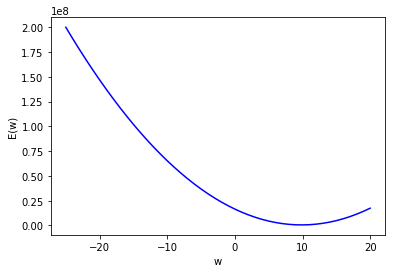

In [9]:
ws = np.linspace(-25,20,46)

plt.plot(ws, E(ws), '-', color = 'blue')
plt.ylabel('E(w)')
plt.xlabel('w')
# w = 10辺りが最適っぽい

## 更新式
$$
\begin{eqnarray}
w^{(t+1)} = w^{(t)} - \epsilon \frac{dE(w)}{dw} \\
\end{eqnarray}
$$

## 勾配
$$
\begin{eqnarray}
\nabla E(w) = \frac{dE(w)}{dw} = \sum_{n=1}^{N} x^2_n w - \sum_{n-1}^{n} d_n x_n \\
\end{eqnarray}
$$

In [0]:
def gradient_descent(eps, error=1e-8, iter_max=1000):
    '''
    eps: 学習係数
    error: 収束条件
    iter_max: 繰り返し最大回数
    '''
    
    # wの初期値を決める
    w = np.random.randint(-20, 20) # -20から20 の間の整数を 1 件出力する
    w_history = [w]
    
    for _ in range(iter_max):
        # wの値を更新。
        w_next = w - eps * (sum(x * x * w) - sum(d*x)) #上の式
        if abs(w_next - w) < error:
            break
        w = w_next
        w_history.append(w)

    return w, w_history

Text(0, 0.5, 'E(w)')

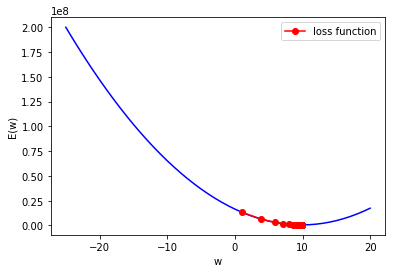

In [11]:
w, w_history = gradient_descent(eps = 1e-06)

plt.plot(ws, E(ws), '-', color = 'blue')
plt.plot(w_history, E(w_history), 'o-', label='loss function', color = 'red')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')

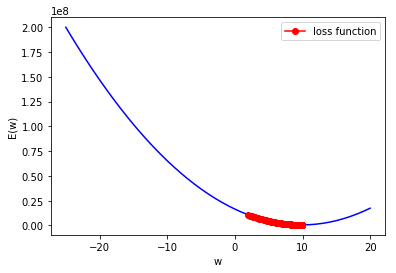

In [12]:
w, w_history = gradient_descent(1e-07)

plt.plot(ws, E(ws), '-', color = 'blue')
plt.plot(w_history, E(w_history), 'o-', label='loss function', color = 'red')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')
plt.show()

Text(0, 0.5, 'E(w)')

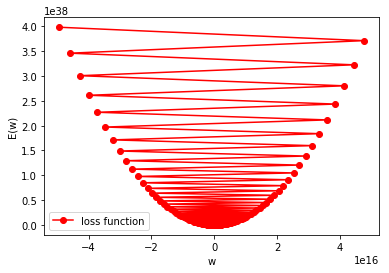

In [13]:
w, w_history = gradient_descent(6.2e-06)

plt.plot(ws, E(ws), '-', color = 'blue')
plt.plot(w_history, E(w_history), 'o-', label='loss function', color = 'red')

plt.legend()
plt.xlabel('w')
plt.ylabel('E(w)')

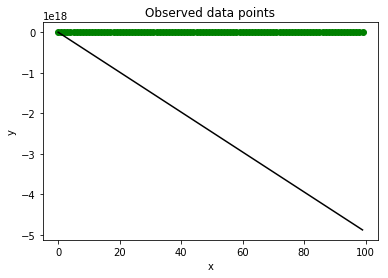

In [14]:
plt.scatter(x, d, color = 'green')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Observed data points')

y = x*w
plt.plot(x,y, color = 'black')

In [15]:
#wの値を表示
w

-4.925671351424488e+16